### The goal of this project is to predict Appliance energy consumption for a house based on factors like temperature, humidity & pressure. This is a regression problem since the target variable(Appliances) is a continuous variable


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Exploratory Data Analysis (EDA) 
#### We will begin to perform some data analytics to draw some useful insight from the dataset



In [2]:
df = pd.read_csv('energydata_complete.csv')
#A sneak peak into what the data looks like
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
#Statistical summary of the dataset
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [4]:
df.isna().sum() #No missing values in the dataset😊

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [5]:
#Initialize target and feature variables
target_var = df.Appliances
features_var = df.drop('Appliances', axis=1)

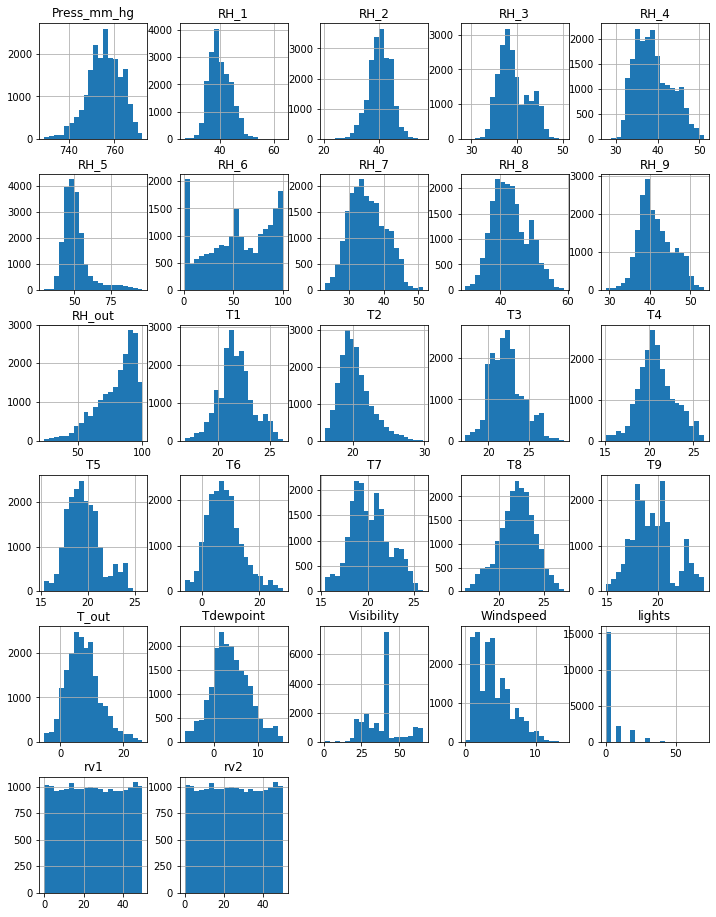

In [13]:
# Histogram of all the features to understand the distribution
features_var.hist(bins = 20 , figsize= (12,16)) ;

### Observation
#### Most of the variables seem to have a normal distribution apart from 'Visibilty', 'lights' 'RH_6', 'RH_OUT' and 'Windspeed'. For better analysis we could classify these variables into seperate classes.


In [15]:
# Divide the columns based on type for clear column management 

temperature_column = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

humidity_column = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

weather_column = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 
light = ["lights"]

random_columns = ["rv1", "rv2"]

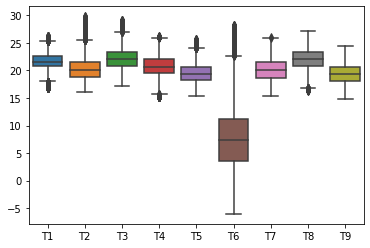

In [16]:
#We can use boxplots to determine and detect outliers in these classes
temp_data = df[temperature_column]
sns.boxplot(data=temp_data)

In [17]:
#Remove T6 and find the range of temperature within the house
temp_data = temp_data.drop('T6', axis=1)
temp_data.describe()

,T1,T2,T3,T4,T5,T7,T8,T9
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,20.341219,22.267611,20.855335,19.592106,20.267106,22.029107,19.485828
std,1.606066,2.192974,2.006111,2.042884,1.844623,2.109993,1.956162,2.014712
min,16.790000,16.100000,17.200000,15.100000,15.330000,15.390000,16.306667,14.890000
25%,20.760000,18.790000,20.790000,19.530000,18.277500,18.700000,20.790000,18.000000
50%,21.600000,20.000000,22.100000,20.666667,19.390000,20.033333,22.100000,19.390000
75%,22.600000,21.500000,23.290000,22.100000,20.619643,21.600000,23.390000,20.600000
max,26.260000,29.856667,29.236000,26.200000,25.795000,26.000000,27.230000,24.500000


### Observations

- We can see that there is a variation in the distribution between T6 and every other temperature variable. This is because T6 represents the temperature outside the house and it is averagely much lower than the temperature within the house and so it can be dropped
- We can also observe that the range of temperature within the house is 15°C to 30°C

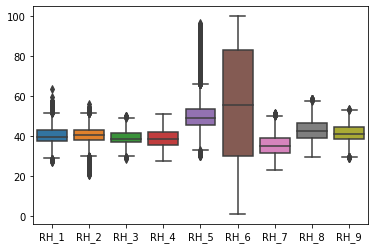

In [18]:
#We can use boxplots to determine and detect outliers in these classes
humidity_data = df[humidity_column]
sns.boxplot(data=humidity_data)

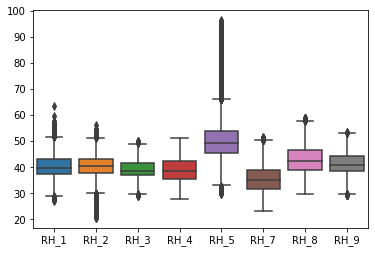

In [19]:
#Drop RH_6
humidity_data =  humidity_data.drop('RH_6', axis=1)
sns.boxplot(data=humidity_data)

### Obeservation
- Similar to T6, RH_6 is the humidity measurement outside the house and so ought to be dropped
- RH_5 has so many outliers and this isn't strange because that's the bathroom. According to study, "The bathroom is likely to suffer from condensation more than any other room in your property. This is because a large amount of moisture is produced when you shower or take a bath. When water in the bathroom dries out, it evaporates into the air. This increases the humidity level" -Chris Scott CSSW

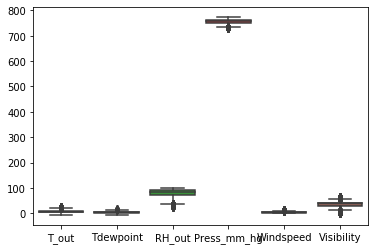

In [20]:
#Boxplots for the weather variables
weather_data = df[weather_column]
sns.boxplot(data=weather_data)